<a href="https://colab.research.google.com/github/1900690/heatmap_yolo/blob/main/image-heatmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[参考:https://github.com/rigvedrs/YOLO-V11-CAM/blob/main/YOLO_v11_EigenCAM.ipynb](https://github.com/rigvedrs/YOLO-V11-CAM/blob/main/YOLO_v11_EigenCAM.ipynb)

In [1]:
#@title 事前準備
!pip -q install ultralytics
!pip -q install ttach
import ultralytics
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')  # Suppress Matplotlib warnings

plt.rcParams["figure.figsize"] = [3.0, 3.0]

!git clone https://github.com/rigvedrs/YOLO-V11-CAM.git

%cd /content/YOLO-V11-CAM
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultral

In [2]:
#ライブラリをインポート(機能を使えるようにする)
import shutil
import os
from google.colab import files
import math


#すでにフォルダがある場合は消す
if os.path.exists("/content/datasets"):
  shutil.rmtree("/content/datasets")

#データをアップロード
#uploaded = files.upload()
#file_name = list(uploaded.keys())[0]
file_name ="syakuyaku500_20250204083452.zip"
#データを解凍
shutil.unpack_archive('/content/'+file_name, '/content/')
#zipを消す
os.remove('/content/'+file_name)

#オブジェクト検出

In [4]:
import glob
import os

model = YOLO('/content/opt.pt')
model = model.cpu()

os.makedirs('/content/combi-obj', exist_ok=True)

file_list = sorted(glob.glob('/content/original/*.jpg'))

for filename in file_list:
    img = cv2.imread(filename)
    img = cv2.resize(img, (640, 640))
    rgb_img = img.copy()
    img = np.float32(img) / 255

    target_layers =[model.model.model[-2]]#[model.model.model[-2]]
    cam = EigenCAM(model, target_layers,task='od')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
    comb_image=Image.fromarray(np.hstack((im, cam_image)))
    comb_image.save("/content/combi-obj/"+os.path.basename(filename))


0: 640x640 1 OK, 2263.0ms
Speed: 10.2ms preprocess, 2263.0ms inference, 26.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 OK, 2182.2ms
Speed: 3.1ms preprocess, 2182.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 NG, 2124.5ms
Speed: 2.7ms preprocess, 2124.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 NG, 2444.1ms
Speed: 2.9ms preprocess, 2444.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 NG, 2574.2ms
Speed: 2.9ms preprocess, 2574.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 OK, 2042.9ms
Speed: 2.7ms preprocess, 2042.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 OK, 2098.0ms
Speed: 5.4ms preprocess, 2098.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 NG, 2115.6ms
Speed: 3.3ms preprocess, 2115.6ms inference, 0.8ms postprocess per image at shape (1, 3, 

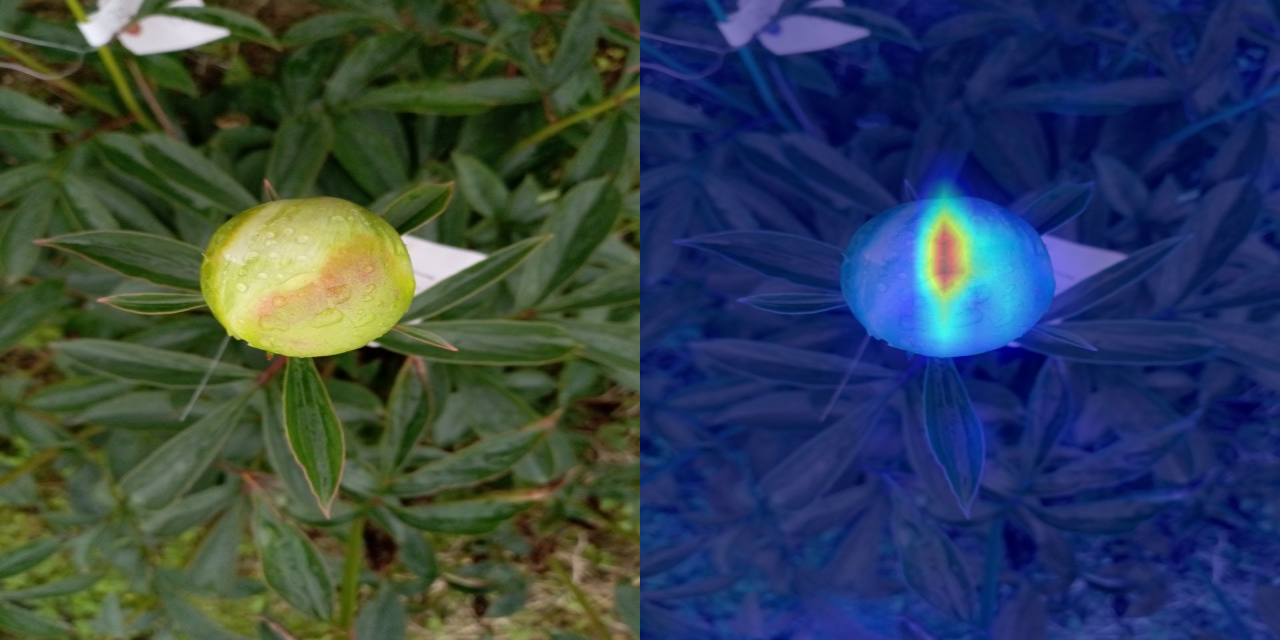

In [ ]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))

In [ ]:
#@markdown 作ったファイルをダウンロード
import shutil
import os
from google.colab import files

shutil.make_archive('/content/combi', 'zip', '/content/combi')

#ダウンロード
#files.download("/content/datasets.zip")

'/content/combi.zip'

##判定結果と合わせて表示する

In [6]:
#判定済みと結合
import glob
import os
from ultralytics import YOLO


model = YOLO("/content/opt.pt")
results = model(source="/content/original/", save=True, save_conf=True)


model = YOLO('/content/opt.pt')
model = model.cpu()

os.makedirs('/content/combi2-obj', exist_ok=True)

file_list = sorted(glob.glob('/content/original/*.jpg'))

for filename in file_list:
    img = cv2.imread(filename)
    img = cv2.resize(img, (640, 640))
    rgb_img = img.copy()
    img = np.float32(img) / 255

    img2 = cv2.imread('/content/YOLO-V11-CAM/runs/detect/predict/'+os.path.basename(filename))
    img2 = cv2.resize(img2, (640, 640))
    rgb_img2 = img2.copy()
    img2 = np.float32(img2) / 255

    target_layers =[model.model.model[-2]]#[model.model.model[-2]]
    cam = EigenCAM(model, target_layers,task='od')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    im2 = cv2.cvtColor(rgb_img2, cv2.COLOR_RGB2BGR)
    #comb_image=Image.fromarray(np.hstack((im, cam_image)))
    comb_image=Image.fromarray(np.hstack((im2, cam_image)))
    comb_image.save("/content/combi2-obj/"+os.path.basename(filename))


image 1/8 /content/original/003 (2).jpg: 640x480 1 OK, 105.8ms
image 2/8 /content/original/004 (2).jpg: 640x480 1 OK, 60.7ms
image 3/8 /content/original/006 (2).jpg: 480x640 1 NG, 84.1ms
image 4/8 /content/original/007 (2).jpg: 640x480 1 NG, 46.8ms
image 5/8 /content/original/007 (3).jpg: 640x480 1 NG, 40.4ms
image 6/8 /content/original/008 (2).jpg: 640x480 1 OK, 39.1ms
image 7/8 /content/original/010 (2).jpg: 480x640 1 OK, 39.9ms
image 8/8 /content/original/011 (2).jpg: 640x480 1 NG, 38.6ms
Speed: 2.1ms preprocess, 56.9ms inference, 52.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict

0: 640x640 1 OK, 2137.9ms
Speed: 2.9ms preprocess, 2137.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 OK, 2143.8ms
Speed: 3.2ms preprocess, 2143.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 NG, 2127.7ms
Speed: 3.4ms preprocess, 2127.7ms inference, 0.9ms postprocess per image at shape (1, 3,

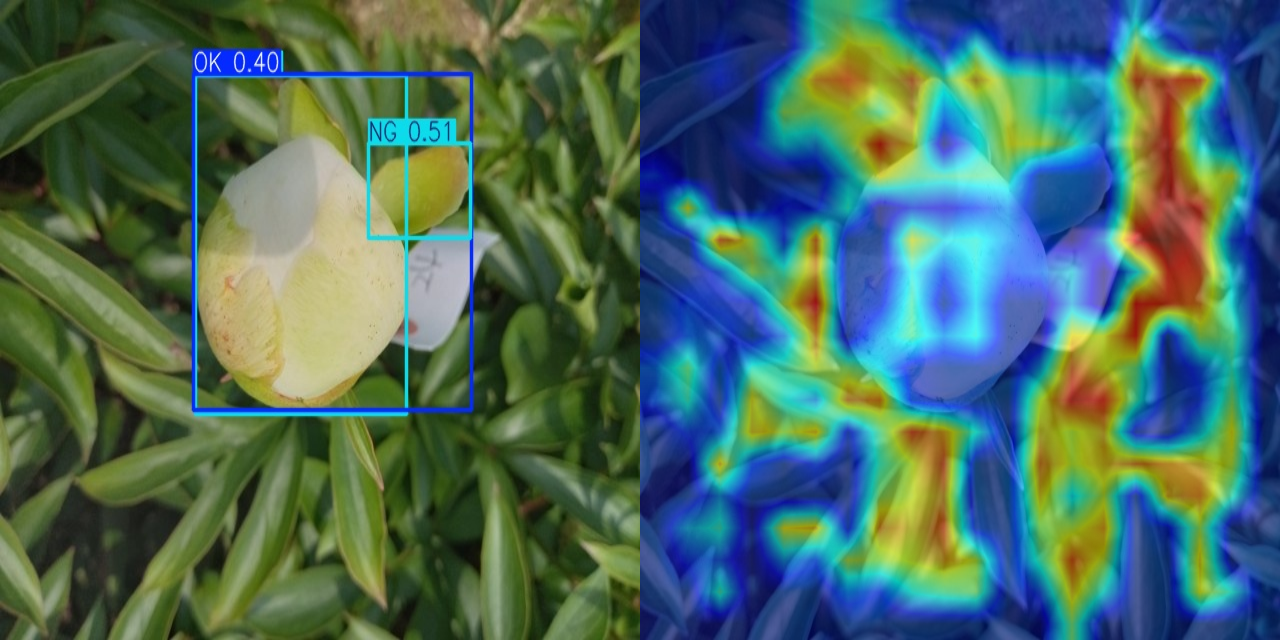

In [ ]:
im2 = cv2.cvtColor(rgb_img2, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im2, cam_image)))

In [7]:
#@markdown 作ったファイルをダウンロード
import shutil
import os
from google.colab import files

shutil.make_archive('/content/combi2-obj', 'zip', '/content/combi2-obj')

#ダウンロード
#files.download("/content/datasets.zip")

'/content/combi2-obj.zip'

#クラス分け

In [ ]:
import glob
import os

model = YOLO('/content/cls-last-model.pt')
model = model.cpu()

os.makedirs('/content/combi-cls', exist_ok=True)

file_list = sorted(glob.glob('/content/original/*.jpg'))

for filename in file_list:
    img = cv2.imread(filename)
    img = cv2.resize(img, (640, 640))
    rgb_img = img.copy()
    img = np.float32(img) / 255

    target_layers =[model.model.model[-2]]#[model.model.model[-2]]
    cam = EigenCAM(model, target_layers,task='cls')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
    comb_image=Image.fromarray(np.hstack((im, cam_image)))
    comb_image.save("/content/combi-cls/"+os.path.basename(filename))


0: 640x640 OK 0.51, NG 0.49, 1753.7ms
Speed: 11.1ms preprocess, 1753.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 NG 0.61, OK 0.39, 1354.9ms
Speed: 8.7ms preprocess, 1354.9ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 NG 0.62, OK 0.38, 1297.4ms
Speed: 7.4ms preprocess, 1297.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 OK 0.70, NG 0.30, 1301.6ms
Speed: 9.7ms preprocess, 1301.6ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 NG 0.54, OK 0.46, 1284.9ms
Speed: 8.7ms preprocess, 1284.9ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 OK 0.52, NG 0.48, 1371.0ms
Speed: 7.2ms preprocess, 1371.0ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 NG 0.60, OK 0.40, 1325.2ms
Speed: 7.2ms preprocess, 1325.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 NG 0.60, OK 0.40, 214

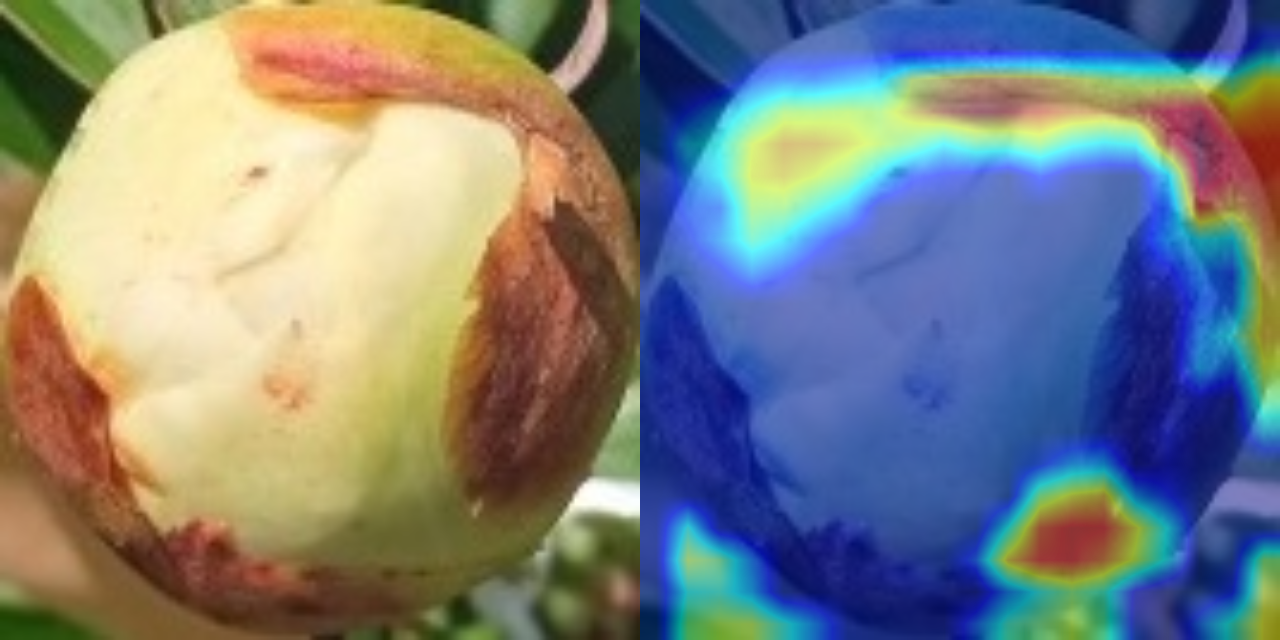

In [ ]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))

In [ ]:
#判定結果を取得
from ultralytics import YOLO
model = YOLO("/content/cls-last-model.pt")
results = model(source="/content/original/", save=True, save_conf=True)

100%|██████████| 755k/755k [00:00<00:00, 91.4MB/s]

image 1/25 /content/original/001 (2)_0.jpg: 640x640 OK 0.51, NG 0.49, 52.9ms
image 2/25 /content/original/002 (2)_0.jpg: 640x640 NG 0.61, OK 0.39, 53.0ms
image 3/25 /content/original/005 (2)_0.jpg: 640x640 NG 0.62, OK 0.38, 52.9ms


image 4/25 /content/original/009 (2)_0.jpg: 640x640 OK 0.70, NG 0.30, 52.9ms
image 5/25 /content/original/018 (2)_0.jpg: 640x640 NG 0.54, OK 0.46, 52.8ms
image 6/25 /content/original/018 (5)_0.jpg: 640x640 OK 0.52, NG 0.48, 40.6ms
image 7/25 /content/original/019 (2)_0.jpg: 640x640 NG 0.60, OK 0.40, 31.4ms
image 8/25 /content/original/020 (2)_0.jpg: 640x640 NG 0.57, OK 0.43, 31.3ms
image 9/25 /content/original/021 (2)_0.jpg: 640x640 NG 0.52, OK 0.48, 30.8ms
image 10/25 /content/original/025 (2)_0.jpg: 640x640 OK 0.60, NG 0.40, 29.4ms
image 11/25 /content/original/029 (3)_0.jpg: 640x640 OK 0.54, NG 0.46, 27.0ms
image 12/25 /content/original/030 (2)_0.jpg: 640x640 OK 0.55, NG 0.45, 27.7ms
image 13/25 /content/original/031 (2)_0.jpg: 640x640 OK 0.71, NG 0.29, 27.5ms
image 14/25 /content/original/032 (2)_0.jpg: 640x640 NG 0.52, OK 0.48, 27.4ms
image 15/25 /content/original/033 (2)_0.jpg: 640x640 OK 0.71, NG 0.29, 27.5ms
image 16/25 /content/original/041 (1)_0.jpg: 640x640 OK 0.67, NG 0.33,

##判定結果と合わせて表示する

In [ ]:
#判定済みと結合
import glob
import os

model = YOLO('/content/cls-last-model.pt')
model = model.cpu()

os.makedirs('/content/combi2-cls', exist_ok=True)

file_list = sorted(glob.glob('/content/original/*.jpg'))

for filename in file_list:
    img = cv2.imread(filename)
    img = cv2.resize(img, (640, 640))
    rgb_img = img.copy()
    img = np.float32(img) / 255

    img2 = cv2.imread('/content/YOLO-V11-CAM/runs/classify/predict/'+os.path.basename(filename))
    img2 = cv2.resize(img2, (640, 640))
    rgb_img2 = img2.copy()
    img2 = np.float32(img2) / 255

    target_layers =[model.model.model[-2]]#[model.model.model[-2]]
    cam = EigenCAM(model, target_layers,task='cls')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    im2 = cv2.cvtColor(rgb_img2, cv2.COLOR_RGB2BGR)
    #comb_image=Image.fromarray(np.hstack((im, cam_image)))
    comb_image=Image.fromarray(np.hstack((im2, cam_image)))
    comb_image.save("/content/combi2-cls/"+os.path.basename(filename))


0: 640x640 OK 0.51, NG 0.49, 1142.8ms
Speed: 6.4ms preprocess, 1142.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 NG 0.61, OK 0.39, 1190.8ms
Speed: 7.8ms preprocess, 1190.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 NG 0.62, OK 0.38, 1186.4ms
Speed: 7.7ms preprocess, 1186.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 OK 0.70, NG 0.30, 1198.5ms
Speed: 8.9ms preprocess, 1198.5ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 NG 0.54, OK 0.46, 2614.3ms
Speed: 15.5ms preprocess, 2614.3ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 OK 0.52, NG 0.48, 1240.2ms
Speed: 14.8ms preprocess, 1240.2ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 NG 0.60, OK 0.40, 1211.2ms
Speed: 7.2ms preprocess, 1211.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 NG 0.60, OK 0.40, 11

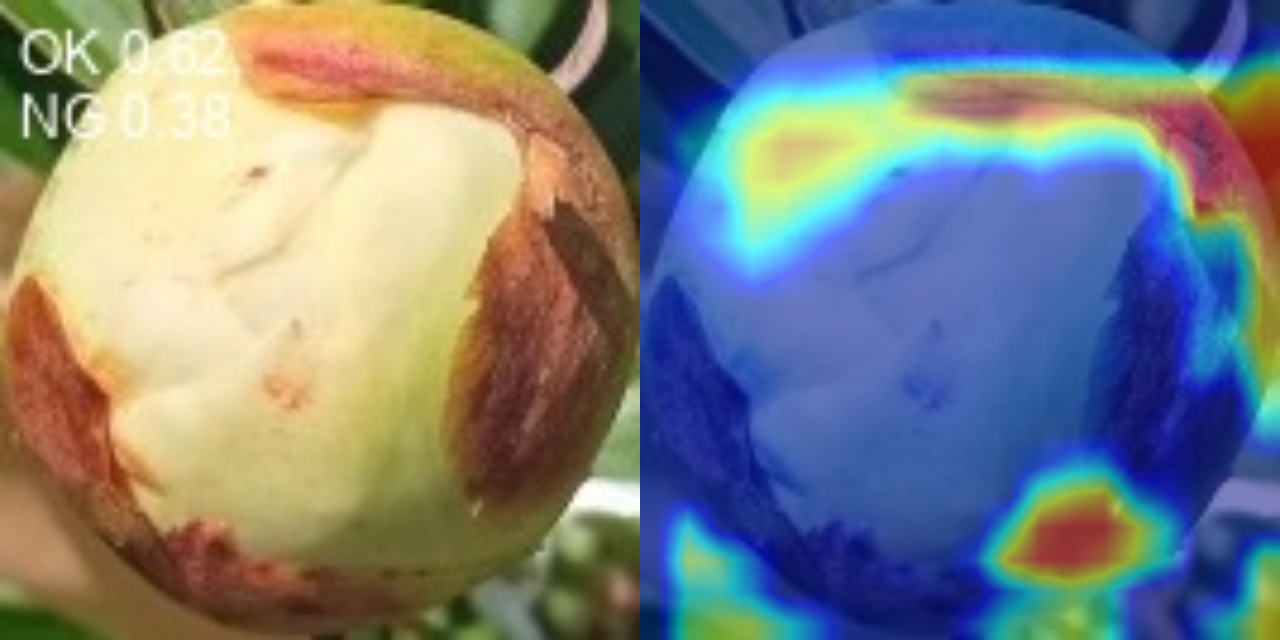

In [ ]:
im2 = cv2.cvtColor(rgb_img2, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im2, cam_image)))

In [ ]:
#@markdown 作ったファイルをダウンロード
import shutil
import os
from google.colab import files

shutil.make_archive('/content/combi2-cls', 'zip', '/content/combi2-cls')

#ダウンロード
#files.download("/content/datasets.zip")

'/content/combi2-cls.zip'